##### imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Model Training
## Regression

##### read data

In [2]:
mpg_data = pd.read_fwf('data/auto-mpg.data', header=None)
mpg_data.columns = [
    'mpg', 
    'cylinders', 
    'displacement', 
    'horsepower', 
    'weight', 
    'acceleration', 
    'model year', 
    'origin', 
    'car name',
]
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


##### check all dtypes

In [3]:
mpg_data.dtypes # horsepower must be float

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

##### check why horsepower is obj but not float64

In [4]:
mpg_data['horsepower'].unique() # there is a '?' in the dataset

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

##### check once again where there is '?' in the dataset

In [5]:
mpg_data[mpg_data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


##### replace '?' with float -> 0

In [6]:
mpg_data['horsepower'].where(lambda x: x != '?', other=0, inplace=True)
# mpg_data['horsepower'].replace({'?': 0}, inplace=True)

##### convert the dtype from obj to float64

In [7]:
mpg_data['horsepower'] = mpg_data['horsepower'].astype(np.float64)

##### check again is there a '?' sign

In [8]:
mpg_data[mpg_data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [9]:
mpg_data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
         0., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

##### check the dtypes again

In [10]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

##### remove feature 'car name' -> we don't need it in the model

In [11]:
mpg_data = mpg_data.drop('car name', axis=1)

##### separate attributes and targets from the dataset

In [12]:
mpg_data_attr = mpg_data.drop('mpg', axis=1)
mpg_data_trg = mpg_data['mpg']

##### scaling the attributes

In [13]:
scalar = MinMaxScaler()
mpg_data_attr_scaled = scalar.fit_transform(mpg_data_attr)

##### check the scaling is ok -> min must be 0 and max must be 1

In [14]:
mpg_data_attr_scaled.min(axis=0), mpg_data_attr_scaled.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

##### create linear regression model

In [15]:
lr_model = LinearRegression()
lr_model.fit(mpg_data_attr_scaled, mpg_data_trg)

LinearRegression()

##### check the score from lr -> must be 0-1 (it is better if it is higher)

In [16]:
lr_model.score(mpg_data_attr_scaled, mpg_data_trg)

0.8210036685139731

##### apply regularization L2 -> Ridge 

In [17]:
l2_regr = Ridge(alpha=0.1)
l2_regr.fit(mpg_data_attr_scaled, mpg_data_trg)

Ridge(alpha=0.1)

##### check the score from l2 -> must be 0-1 (it is better if it is higher)

In [18]:
l2_regr.score(mpg_data_attr_scaled, mpg_data_trg)

0.8208660672478484

##### apply regularization L1 -> Lasso (here the reg makes feature selction and make some values = 0)

In [19]:
l1_regr = Lasso(alpha=0.1)
l1_regr.fit(mpg_data_attr_scaled, mpg_data_trg)

Lasso(alpha=0.1)

##### check the score from l1 -> must be 0-1 (it is better if it is higher)

In [20]:
l1_regr.score(mpg_data_attr_scaled, mpg_data_trg)

0.8130067230680705

##### apply both L1 and L2

In [21]:
l12_regr = ElasticNet(alpha=0.01, l1_ratio=0.01)
l12_regr.fit(mpg_data_attr_scaled, mpg_data_trg)

ElasticNet(alpha=0.01, l1_ratio=0.01)

##### check the score

In [22]:
l12_regr.score(mpg_data_attr_scaled, mpg_data_trg)

0.8020923988283815

##### split the data for train test and set train_size=0.7 (70% form the data)

In [23]:
mpg_attr_train, mpg_attr_test, mpg_trg_train, mpg_trg_test = train_test_split(
                                                                    mpg_data_attr_scaled, 
                                                                    mpg_data_trg, 
                                                                    train_size=0.7,
                                                                    random_state=30)

##### check the split data shape

In [24]:
mpg_attr_train.shape, mpg_attr_test.shape

((278, 7), (120, 7))

In [25]:
mpg_trg_train.shape, mpg_trg_test.shape

((278,), (120,))

##### train the model with data that its have been seen

In [26]:
lr_model_tt = LinearRegression()
lr_model_tt.fit(mpg_attr_train, mpg_trg_train)

LinearRegression()

##### check the score from the train

In [27]:
lr_model_tt.score(mpg_attr_train, mpg_trg_train)

0.8371687597900324

##### ckeck the score with data that its not have been seen

In [28]:
lr_model_tt.score(mpg_attr_test, mpg_trg_test)

0.7744482740237989

##### Let compare the predicted vals and the original vals

In [29]:
mpg_predicted = lr_model_tt.predict(mpg_attr_test)

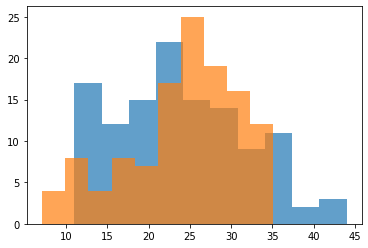

In [30]:
plt.hist(mpg_trg_test, alpha=0.7)
plt.hist(mpg_predicted, alpha=0.7)
plt.show()

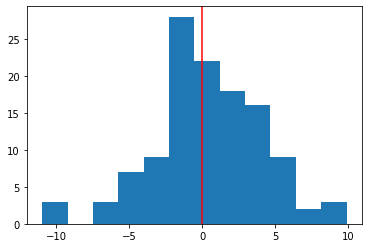

In [31]:
plt.hist(mpg_predicted-mpg_trg_test, bins='fd')
plt.axvline(0, c='r')
plt.show()

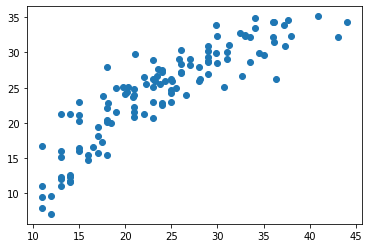

In [32]:
plt.scatter(mpg_trg_test, mpg_predicted)
plt.show()

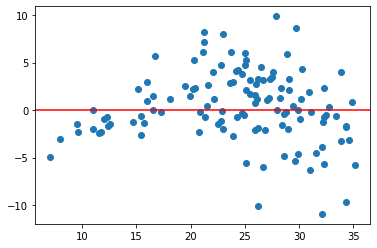

In [33]:
plt.scatter(mpg_predicted, mpg_predicted-mpg_trg_test)
plt.axhline(0, c='r')
plt.show()

##### conclusion -> this model has high bias (underfited)